In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import the dataset of Home Buyers prices
flatdata = pd.read_csv('HomeBuyer.csv')
X = flatdata.iloc[:,[0, 1]].values
y = flatdata.iloc[:,2].values

In [4]:
# split the dataset into training and test set. We will use 75/25 approach
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

In [6]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)


In [7]:
# Fit the SVM to the train data.
# probability = True is used to calculate probability also.
from sklearn.svm import SVC
SVC_Classifier = SVC(kernel = 'linear', random_state = 0, probability = True)
SVC_Classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

In [8]:
#Predict the values
prediction = SVC_Classifier.predict(X_test)

In [9]:
print("")
print("prediction for test data :-")
print(prediction)
print("")


prediction for test data :-
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]



In [10]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [11]:
#create confusin matrix

from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, prediction)
print(confusionMatrix)

[[66  2]
 [ 8 24]]


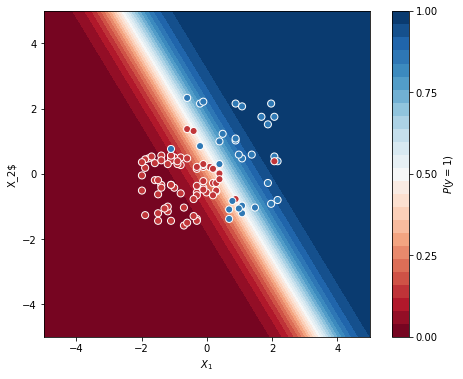

In [12]:
#let us visualize it
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = SVC_Classifier.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize = (8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap = "RdBu", vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0,.25,.5,.75,1])

ax.scatter(X_test[:,0], X_test[:,1], c = (y_test == 1), s = 50,
          cmap = "RdBu", vmin = -.2, vmax=1.2,
          edgecolor= "white", linewidth = 1)

ax.set(aspect = "equal", xlim = (-5,5), ylim=(-5,5), 
      xlabel="$X_1$", ylabel="X_2$")
plt.show()